# dataset preparation

In [1]:
import joblib
import timeit
start = timeit.default_timer()
new_dict = joblib.load('C:\\Users\\Saeth\\Downloads\\propDict66to74_033019mV3')
stop = timeit.default_timer()
print('time load freq_dict (Sec): ', stop-start)

time load freq_dict (Sec):  107.63883710000664


In [2]:
len(new_dict)

998891

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy import stats
from sklearn.decomposition import PCA
import random
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore") 

In [58]:
list(new_dict.values())[0]

[38038254,
 tensor([-6.1579e+06, -1.0449e+07, -2.0904e+06,  5.4271e+06,  7.3114e+06,
         -4.6314e+06, -3.1506e+06,  2.3704e+07, -1.2073e+07, -8.0048e+06,
          1.3941e+07,  3.4028e+06, -5.6821e+06,  1.5665e+07, -1.7843e+07,
          1.7950e+07,  1.8587e+07, -6.4675e+06,  4.8091e+06,  1.8297e+06,
          1.2293e+05, -2.0704e+06,  7.2447e+05,  2.4786e+07,  2.4148e+07,
          5.5550e+06, -6.4909e+06,  1.6934e+07, -6.2883e+06, -7.6185e+06,
          8.3172e+06, -5.6278e+06, -2.7489e+07, -1.4342e+07, -1.1048e+07,
          1.0982e+06, -1.8835e+07, -1.4947e+07, -1.2498e+07,  4.4646e+06,
         -2.2519e+07, -1.4141e+07,  8.2283e+06, -1.3406e+06, -5.9167e+06,
         -1.8093e+07,  1.3263e+07, -7.3736e+06, -7.4088e+06, -1.9122e+07,
         -3.1872e+06,  1.1654e+07, -3.2453e+06, -1.5337e+06,  5.1561e+06,
          3.3326e+07, -6.1884e+06, -1.3691e+07, -1.6361e+07, -7.8178e+06,
          5.1307e+06, -4.3563e+06,  4.7831e+06, -2.3452e+07,  1.3342e+07,
         -1.1122e+06,  9.70

In [43]:
# word frequency VS l2-norm plot
def local_prop_plot(prop, new_dict, stop, typ, squ):
    figure(figsize=(4, 3), dpi=80)
    #[f[0] for f in list(new_dict.values())]
    x=[np.log2(f[0]) for f in list(new_dict.values())]
    if prop == 'l2norm':
        if squ!= 'square':
            y=[f[2]/f[0] for f in list(new_dict.values())]
        else:
            y=[(f[2]/f[0])**2 for f in list(new_dict.values())]
    else:
        y=[f[1] for f in list(new_dict.values())]
    res = stats.linregress(x, y)

    #plt.scatter(x,y)
    #z = np.polyfit(x, y, 1)
    #p = np.poly1d(z)
    #plt.plot(x,p(x),"r--")

    plt.scatter(x,y, label='raw data')
    plt.plot(x, [res.slope*j + res.intercept for j in x], "r--", label='trend line')
    plt.legend()
    plt.title(stop + ' words' + ' (' + typ + ')')
    plt.xlabel('log2 frequency')
    if prop == 'l2norm':
        if squ!= 'square':
            plt.ylabel('average l2 norm')
        else:
            plt.ylabel('average squared l2 norm')
    else:
        plt.ylabel('local isotropy')
    plt.show()

    print(f"The Pearson correlation coefficient: {res.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {res.pvalue:.6f}")
    print(stats.spearmanr(x, y))
    print('slope: ', res.slope, '(' + squ + ' norm/' + 'log2-frequency)')

In [4]:
# stop words
dict_stop = {i:k for (i,k) in new_dict.items() if i[2]=='STOP'}
len(dict_stop)

1466

In [5]:
# non-stop words
dict_non_stop = {i:k for (i,k) in new_dict.items() if i[2]=='NON_STOP'}
len(dict_non_stop)

997425

In [12]:
# stop words, noun
dict_stop_N = {i:k for (i,k) in new_dict.items() if i[2]=='STOP' and i[1]=='NOUN'}
len(dict_stop_N)

195

In [13]:
# stop words, verb
dict_stop_V = {i:k for (i,k) in new_dict.items() if i[2]=='STOP' and i[1]=='VERB'}
len(dict_stop_V)

207

In [16]:
# non-stop words, noun
dict_non_stop_N = {i:k for (i,k) in new_dict.items() if i[2]=='NON_STOP' and i[1]=='NOUN'}
len(dict_non_stop_N)

449252

In [17]:
# non-stop words, verb
dict_non_stop_V = {i:k for (i,k) in new_dict.items() if i[2]=='NON_STOP' and i[1]=='VERB'}
len(dict_non_stop_V)

209669

# word frequency VS l2-norm for all word types

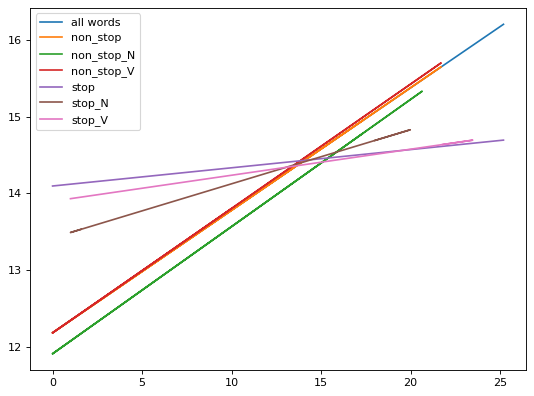

In [18]:
# word frequency VS l2-norm plot of each word type
figure(figsize=(8, 6), dpi=80)
x1=[np.log2(f[0]) for f in list(new_dict.values())]
y1=[f[2]/f[0] for f in list(new_dict.values())]
res1 = stats.linregress(x1, y1)
plt.plot(x1, [res1.slope*j + res1.intercept for j in x1], label='all words')
x2=[np.log2(f[0]) for f in list(dict_non_stop.values())]
y2=[f[2]/f[0] for f in list(dict_non_stop.values())]
res2 = stats.linregress(x2, y2)
plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='non_stop')

x2=[np.log2(f[0]) for f in list(dict_non_stop_N.values())]
y2=[f[2]/f[0] for f in list(dict_non_stop_N.values())]
res2 = stats.linregress(x2, y2)
plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='non_stop_N')

x2=[np.log2(f[0]) for f in list(dict_non_stop_V.values())]
y2=[f[2]/f[0] for f in list(dict_non_stop_V.values())]
res2 = stats.linregress(x2, y2)
plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='non_stop_V')

x2=[np.log2(f[0]) for f in list(dict_stop.values())]
y2=[f[2]/f[0] for f in list(dict_stop.values())]
res2 = stats.linregress(x2, y2)
plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='stop')


x2=[np.log2(f[0]) for f in list(dict_stop_N.values())]
y2=[f[2]/f[0] for f in list(dict_stop_N.values())]
res2 = stats.linregress(x2, y2)
plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='stop_N')

x2=[np.log2(f[0]) for f in list(dict_stop_V.values())]
y2=[f[2]/f[0] for f in list(dict_stop_V.values())]
res2 = stats.linregress(x2, y2)
plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='stop_V')

plt.legend()
plt.show()

In [15]:
norms = [v[2]/v[0] for v in new_dict.values()]
print('avg norm: ', sum(norms)/len(norms))

avg norm:  12.542183096463798


# word frequency VS l2-norm for each word type

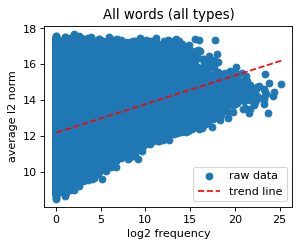

The Pearson correlation coefficient: 0.377472
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3731212298673847, pvalue=0.0)
slope:  0.15969482199963217 (non_square norm/log2-frequency)


In [46]:
local_prop_plot('l2norm', new_dict, 'All', 'all types', 'non_square')

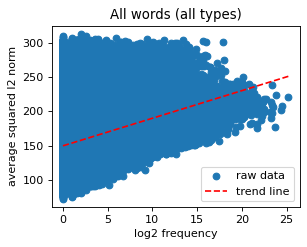

The Pearson correlation coefficient: 0.374233
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3731212298673847, pvalue=0.0)
slope:  4.033839541076078 (square norm/log2-frequency)


In [47]:
local_prop_plot('l2norm', new_dict, 'All', 'all types', 'square')

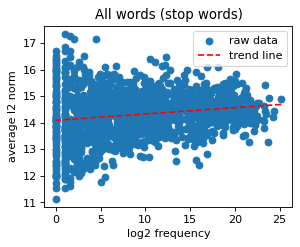

The Pearson correlation coefficient: 0.169722
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.16967522899190451, pvalue=6.213369560956812e-11)
slope:  0.02375977464564598 (non_square norm/log2-frequency)


In [48]:
local_prop_plot('l2norm', dict_stop, 'All', 'stop words', 'non_square')

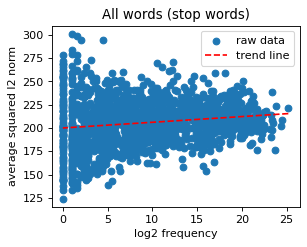

The Pearson correlation coefficient: 0.153852
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.16967522899190451, pvalue=6.213369560956812e-11)
slope:  0.6133993478257321 (square norm/log2-frequency)


In [49]:
local_prop_plot('l2norm', dict_stop, 'All', 'stop words', 'square')

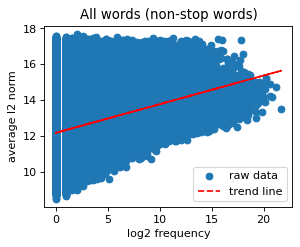

The Pearson correlation coefficient: 0.375470
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.37166766149424735, pvalue=0.0)
slope:  0.15982745164217851 (non_square norm/log2-frequency)


In [50]:
local_prop_plot('l2norm', dict_non_stop, 'All', 'non-stop words', 'non_square')

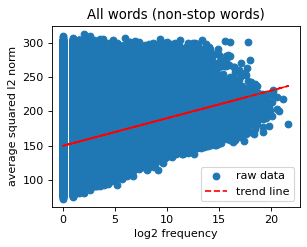

The Pearson correlation coefficient: 0.372060
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.37166766149424735, pvalue=0.0)
slope:  4.034204618304441 (square norm/log2-frequency)


In [51]:
local_prop_plot('l2norm', dict_non_stop, 'All', 'non-stop words', 'square')

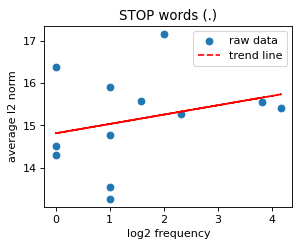

The Pearson correlation coefficient: 0.271875
The p-value (<0.05 to reject null hypothesis): 0.392637
SpearmanrResult(correlation=0.2868286431058876, pvalue=0.36605005879660957)
slope:  0.22158930094471777 (non_square norm/log2-frequency)
number of points:  12


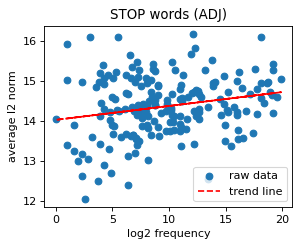

The Pearson correlation coefficient: 0.217874
The p-value (<0.05 to reject null hypothesis): 0.002464
SpearmanrResult(correlation=0.19435382238637694, pvalue=0.007057253531846549)
slope:  0.034744068215531825 (non_square norm/log2-frequency)
number of points:  191


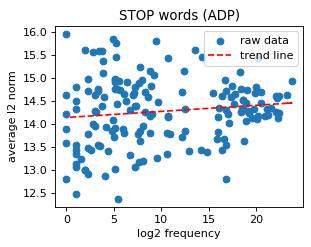

The Pearson correlation coefficient: 0.128716
The p-value (<0.05 to reject null hypothesis): 0.100467
SpearmanrResult(correlation=0.13073716634665197, pvalue=0.09519346777789046)
slope:  0.013263237199772963 (non_square norm/log2-frequency)
number of points:  164


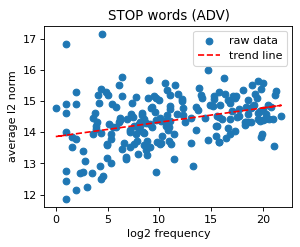

The Pearson correlation coefficient: 0.332702
The p-value (<0.05 to reject null hypothesis): 0.000001
SpearmanrResult(correlation=0.33282975485560845, pvalue=1.1507270765487514e-06)
slope:  0.045994327094061684 (non_square norm/log2-frequency)
number of points:  204


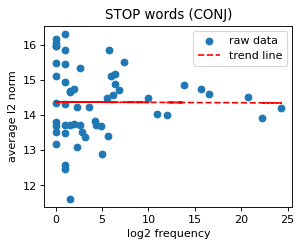

The Pearson correlation coefficient: -0.006263
The p-value (<0.05 to reject null hypothesis): 0.963805
SpearmanrResult(correlation=-0.039320429005919075, pvalue=0.7756284928936068)
slope:  -0.0010720832276609473 (non_square norm/log2-frequency)
number of points:  55


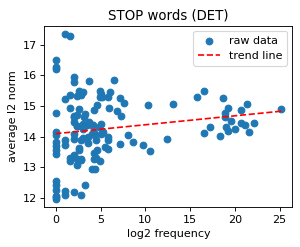

The Pearson correlation coefficient: 0.179801
The p-value (<0.05 to reject null hypothesis): 0.042271
SpearmanrResult(correlation=0.23379805031777265, pvalue=0.007905206175254696)
slope:  0.02916976764416826 (non_square norm/log2-frequency)
number of points:  128


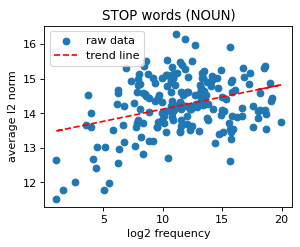

The Pearson correlation coefficient: 0.334261
The p-value (<0.05 to reject null hypothesis): 0.000002
SpearmanrResult(correlation=0.19461941322801213, pvalue=0.00640374764515908)
slope:  0.07060203117802179 (non_square norm/log2-frequency)
number of points:  195


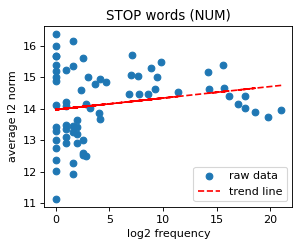

The Pearson correlation coefficient: 0.194587
The p-value (<0.05 to reject null hypothesis): 0.109114
SpearmanrResult(correlation=0.16953563614659373, pvalue=0.16372698120397386)
slope:  0.03668991859666973 (non_square norm/log2-frequency)
number of points:  69


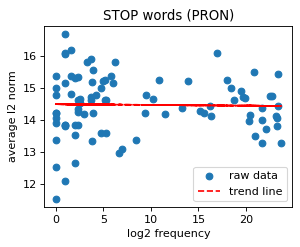

The Pearson correlation coefficient: -0.021687
The p-value (<0.05 to reject null hypothesis): 0.840132
SpearmanrResult(correlation=-0.02115312477258809, pvalue=0.8440160508697057)
slope:  -0.002415224967296358 (non_square norm/log2-frequency)
number of points:  89


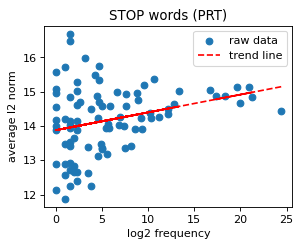

The Pearson correlation coefficient: 0.294209
The p-value (<0.05 to reject null hypothesis): 0.005397
SpearmanrResult(correlation=0.30134251719385213, pvalue=0.004330011071056609)
slope:  0.051898896218497685 (non_square norm/log2-frequency)
number of points:  88


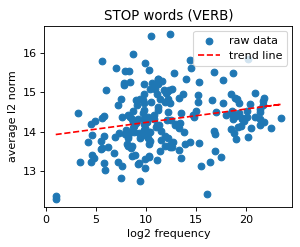

The Pearson correlation coefficient: 0.224243
The p-value (<0.05 to reject null hypothesis): 0.001161
SpearmanrResult(correlation=0.24875274902712965, pvalue=0.00030123690252489317)
slope:  0.03395984883463014 (non_square norm/log2-frequency)
number of points:  207


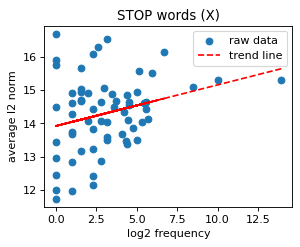

The Pearson correlation coefficient: 0.277996
The p-value (<0.05 to reject null hypothesis): 0.026137
SpearmanrResult(correlation=0.2434308490740995, pvalue=0.05258281908385595)
slope:  0.12318024118729569 (non_square norm/log2-frequency)
number of points:  64


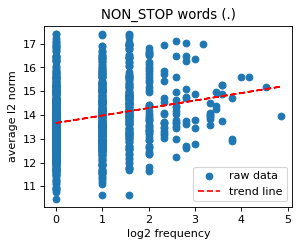

The Pearson correlation coefficient: 0.201987
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.21169574726355772, pvalue=1.4181254790100022e-11)
slope:  0.31582110805592434 (non_square norm/log2-frequency)
number of points:  998


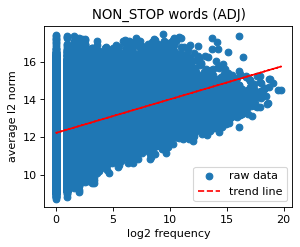

The Pearson correlation coefficient: 0.414411
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.41035987690896497, pvalue=0.0)
slope:  0.17883238565852155 (non_square norm/log2-frequency)
number of points:  187067


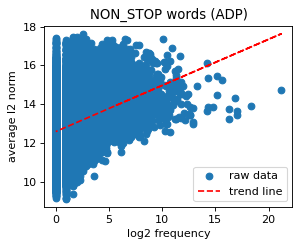

The Pearson correlation coefficient: 0.358731
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3584777410285694, pvalue=0.0)
slope:  0.2375804377104005 (non_square norm/log2-frequency)
number of points:  29772


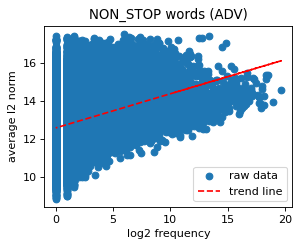

The Pearson correlation coefficient: 0.375013
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.38999743961760136, pvalue=0.0)
slope:  0.17950002787046254 (non_square norm/log2-frequency)
number of points:  64764


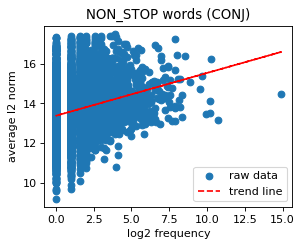

The Pearson correlation coefficient: 0.248349
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.2576550757230548, pvalue=3.408643029015442e-78)
slope:  0.21570457630916587 (non_square norm/log2-frequency)
number of points:  5104


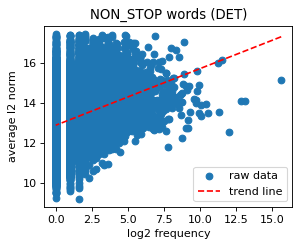

The Pearson correlation coefficient: 0.333287
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.34817447103232746, pvalue=0.0)
slope:  0.28427762632616804 (non_square norm/log2-frequency)
number of points:  14381


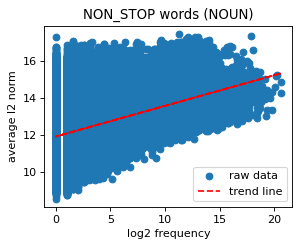

The Pearson correlation coefficient: 0.435751
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3949360922376658, pvalue=0.0)
slope:  0.16584524133930745 (non_square norm/log2-frequency)
number of points:  449252


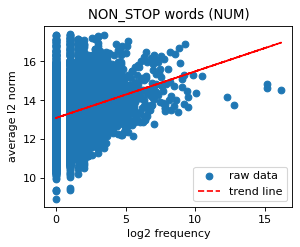

The Pearson correlation coefficient: 0.283833
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.29630703871913977, pvalue=1.6989499234310128e-113)
slope:  0.24008001332892737 (non_square norm/log2-frequency)
number of points:  5581


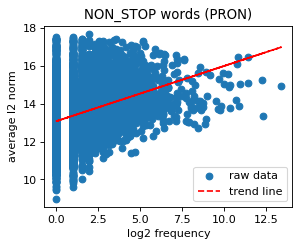

The Pearson correlation coefficient: 0.332399
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3503027347830113, pvalue=3.3975299071644746e-240)
slope:  0.2928020758400751 (non_square norm/log2-frequency)
number of points:  8369


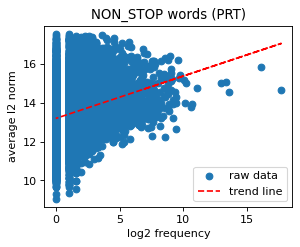

The Pearson correlation coefficient: 0.286615
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3000193756134537, pvalue=3.731913446967758e-205)
slope:  0.21798855005326817 (non_square norm/log2-frequency)
number of points:  9906


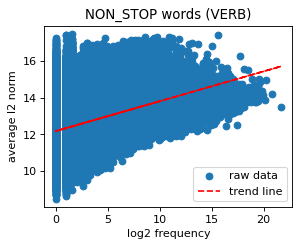

The Pearson correlation coefficient: 0.424257
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.433556179839973, pvalue=0.0)
slope:  0.1621990457898579 (non_square norm/log2-frequency)
number of points:  209669


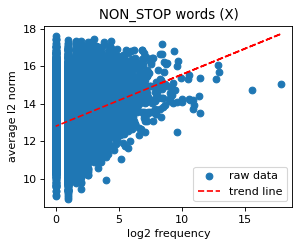

The Pearson correlation coefficient: 0.308031
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.282618200993856, pvalue=2.3159198030217003e-229)
slope:  0.27463497081875204 (non_square norm/log2-frequency)
number of points:  12562


In [52]:
pos_list = sorted(set([i[1] for i in list(new_dict.keys())]))
stop_or_non = ['STOP', 'NON_STOP']
for typ in stop_or_non:
    for pos in pos_list:
        data = {i:k for (i,k) in new_dict.items() if i[1]==pos and i[2]==typ}
        local_prop_plot('l2norm', data, typ, pos, 'non_square')
        print('number of points: ', len(data))

# word frequency VS isotropy, self-similarity, l2-norm variance

In [34]:

# function self-sim
def self_similarity(embs):
    # embs = list of embeddings
    self_sim = 0
    iteration = 0
    for left in range(len(embs)):
        for right in range(left + 1, len(embs)):
            iteration+=1
            self_sim+=cosine_similarity(embs[left].reshape(1,-1), embs[right].reshape(1,-1))[0][0]
    return self_sim/iteration

def self_sim_simple(embs):
    cen=one_avg(embs)
    cal = sum([cosine_similarity(cen.reshape(1,-1), emb.reshape(1,-1))[0][0] for emb in embs])
    try:
        return cal/len(embs)
    except:
        return 0

# funation isotropy
# define in advance
c_all = []
for i in range(1000):
    c_random = np.random.rand(768)
    c_all.append(c_random / np.linalg.norm(c_random))

def isotropy(embs, c_all):
    # embs = list of embeddings
    iso = np.zeros(1000)
    for emb in embs:
        iso += np.array([math.e**(np.dot(c, emb)) for c in c_all])
    return min(iso)/max(iso)

def iso_matrix(embs, c_all):
    matrix_c = np.array([c for c in c_all]).T
    matrix_embs = np.array([np.array(emb) for emb in embs])
    try:
        iso = np.sum(np.exp(np.dot(matrix_embs, matrix_c)), axis = 0)
        return min(iso)/max(iso)
    except:
        return 0

#iso += np.array([math.e**(np.dot(c, emb)) for c in c_all])

def isoV2(embs, c_all):
    out=dict()
    for c in c_all:
        z=0
        for emb in embs:
            z+=math.e**(np.dot(c, emb))
        if math.ceil(z) not in out.keys():
            out[math.ceil(z)]=1
        else:
            out[math.ceil(z)]+=1
    return max(list(out.values()))


def avg_norm(embs):
    try:
        return sum([np.linalg.norm(emb) for emb in embs])/len(embs)
    except:
        return 0

def global_l2_norm(norms):
    try:
        return sum(norms)/len(norms)
    except:
        return 0

pca = PCA()
def one_pca(embs):
    out_embs = []
    for i in embs:
        temp=[]
        for index in range(len(i)):
            temp.append(float(i[index]))
        out_embs.append(temp)
    embs2 = np.array(out_embs)
    try:
        out = pca.fit_transform(embs2)
    except:
        return 'error'
    if embs2.shape != out.shape:
        return 'error'
    else:
        return out.mean(axis=0) 
    
def one_avg(embs):
    try:
        return sum(embs)/len(embs)
    except:
        return 0

In [143]:
# random 1,000 unit vectors
c_all2 = []
for i in range(1000):
    c_random = np.random.rand(768)
    c_all2.append(c_random)

In [59]:
# plot all properties
def global_plot(typ, stop):
    t = [i for i in sorted(new_dict.items(), key=lambda x:-x[1][0]) if i[0][1]==typ and i[0][2]==stop]
    freq = [np.log2(g[1][0]) for g in t]
    no_bin = 10
    move = max(freq)/no_bin
    x=[j for j in range(1,no_bin+1)]
    l2_glo = []
    iso_glo = []
    self_sim_glo = []
    norm2=[]
    l2_norm_var = []
    for index in range(no_bin):
        left = index*move
        if index == no_bin-1:
            right = max(freq)+1
        else:
            right = (index+1)*move
        #print(len([k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]))
        temp = [k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]
        #print(index+1, left, 'to', right, ': ', len(temp))
        emb_all = [h[1][1]/h[1][0] for h in temp]
        norms = [j[1][2]/j[1][0] for j in temp]
        #print('l2-norm var: ', np.var(norms))
        l2_norm_var.append(np.var(norms))
        l2_glo.append(avg_norm(emb_all))
        #print('l2_global: ', l2_glo[-1])
        self_sim_glo.append(self_sim_simple(emb_all))
        #print('self_sim_global: ', self_sim_glo[-1])
        iso_glo.append(iso_matrix(emb_all, c_all))
        #print('isotropy_global: ', iso_glo[-1])
        norm2.append(global_l2_norm(norms))
        #print('norm2: ', norm2[-1])
        
    print('#'*30, stop + ' words' + ' (' + typ + ')', '#'*30)
    print('number of words: ', len(t))
        
    props = [(norm2, 'average l2-norm from each bin'),
             (l2_glo, 'l2 norm from each centroid'),
             (l2_norm_var, 'l2-norm variance'),
             (iso_glo, 'global isotropy'),
             (self_sim_glo, 'global self-similarity')]
    # plot
    for prop in props: 
        figure(figsize=(4, 3), dpi=80)


        plt.bar(x, prop[0])

        plt.title(prop[1])
        plt.xlabel('bin')
        #plt.title('acc of default BERT')
        plt.xticks(x)
        plt.show()

############################## STOP words (.) ##############################
number of words:  12


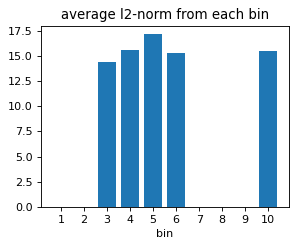

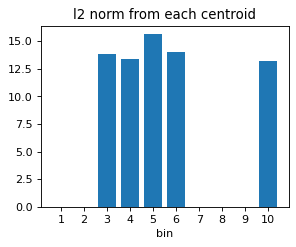

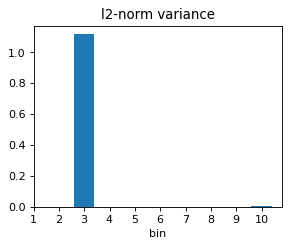

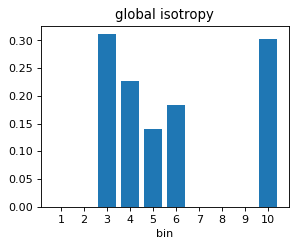

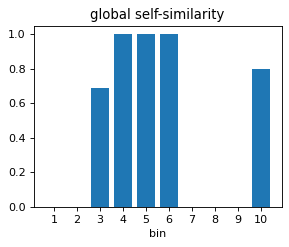

############################## STOP words (ADJ) ##############################
number of words:  191


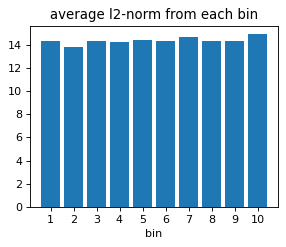

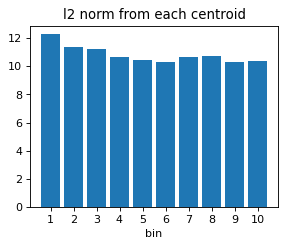

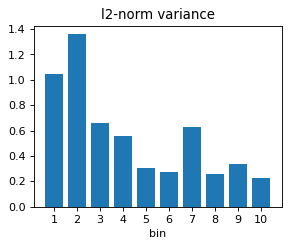

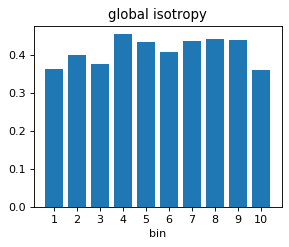

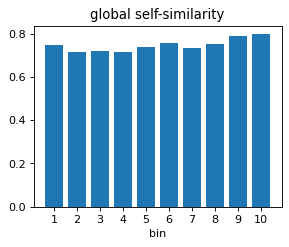

############################## STOP words (ADP) ##############################
number of words:  164


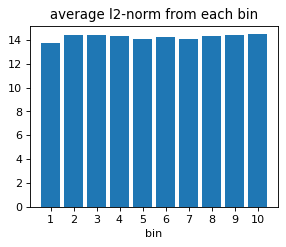

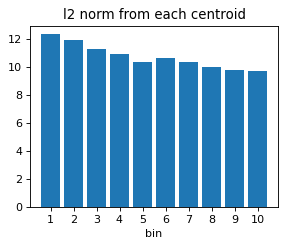

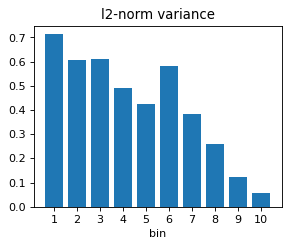

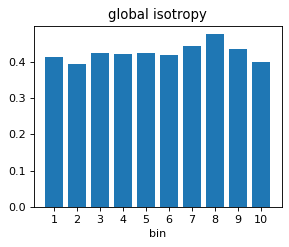

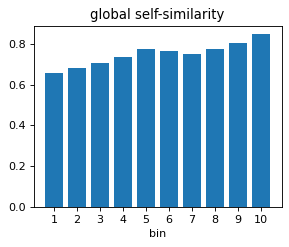

############################## STOP words (ADV) ##############################
number of words:  204


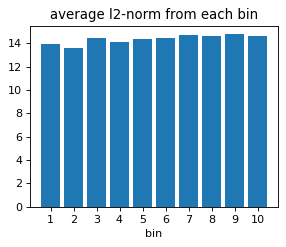

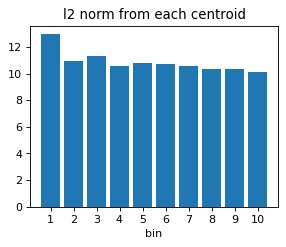

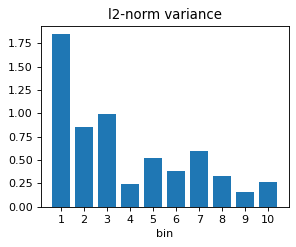

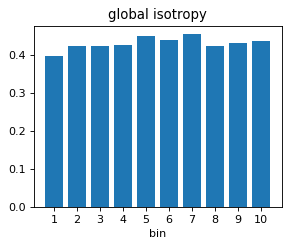

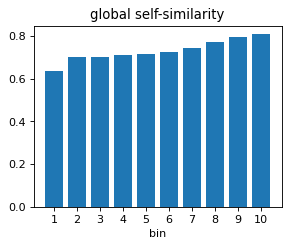

############################## STOP words (CONJ) ##############################
number of words:  55


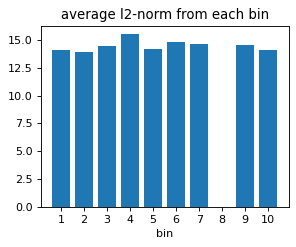

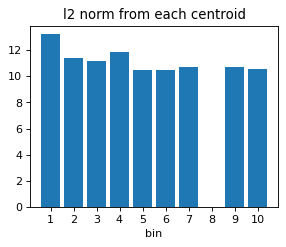

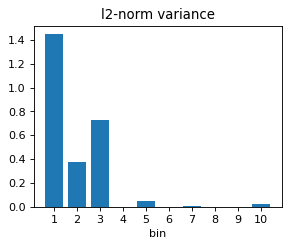

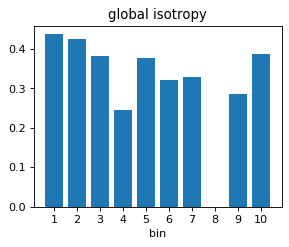

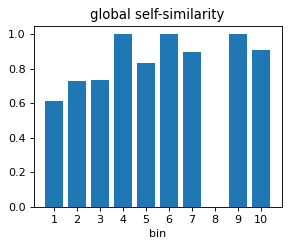

############################## STOP words (DET) ##############################
number of words:  128


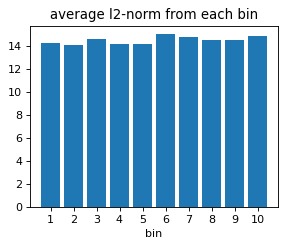

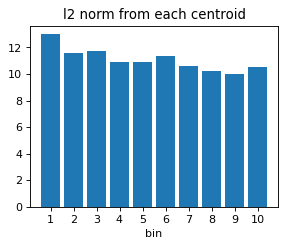

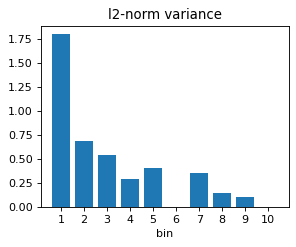

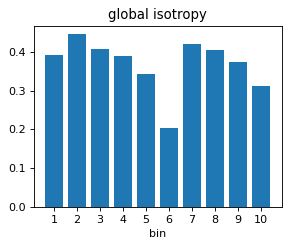

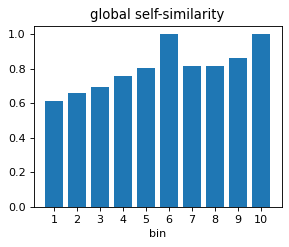

############################## STOP words (NOUN) ##############################
number of words:  195


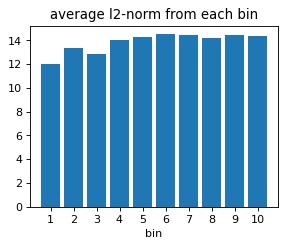

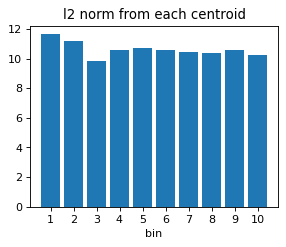

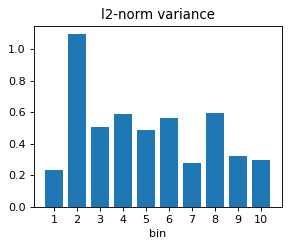

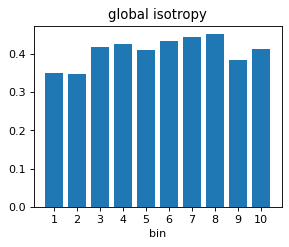

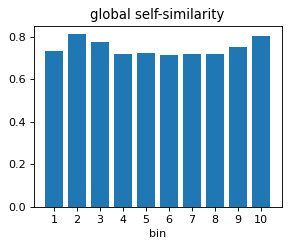

############################## STOP words (NUM) ##############################
number of words:  69


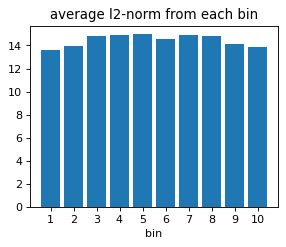

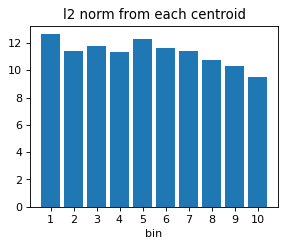

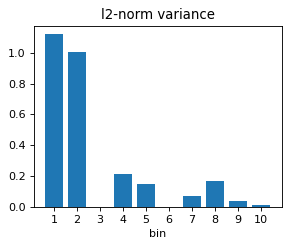

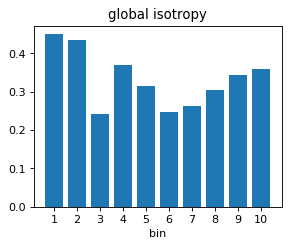

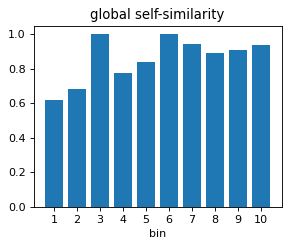

############################## STOP words (PRON) ##############################
number of words:  89


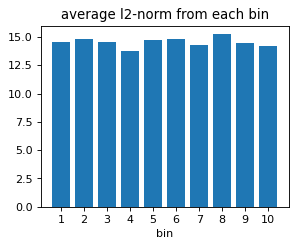

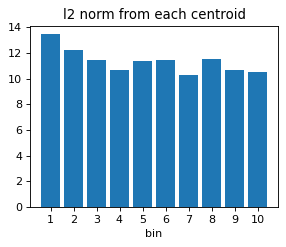

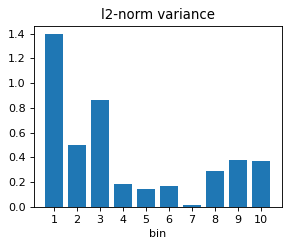

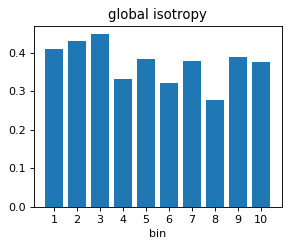

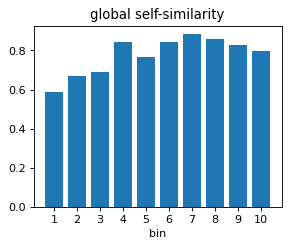

############################## STOP words (PRT) ##############################
number of words:  88


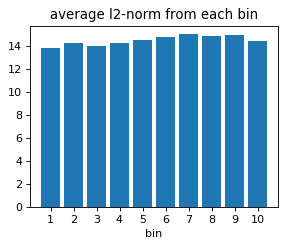

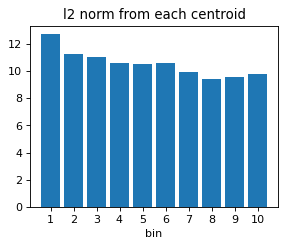

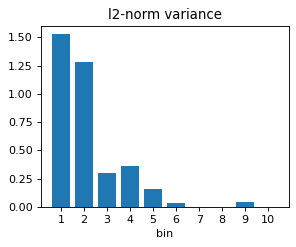

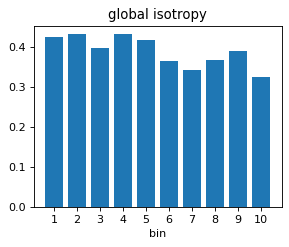

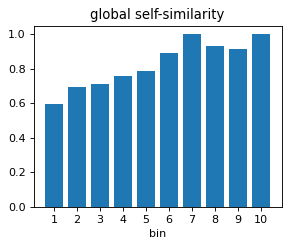

############################## STOP words (VERB) ##############################
number of words:  207


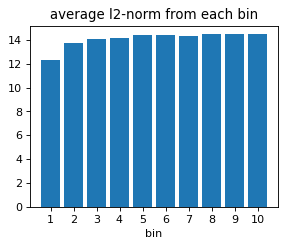

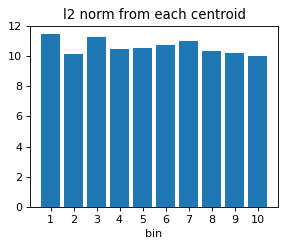

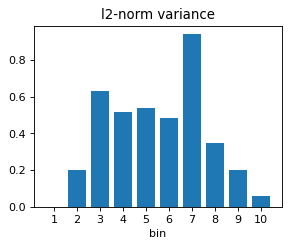

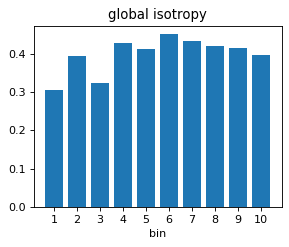

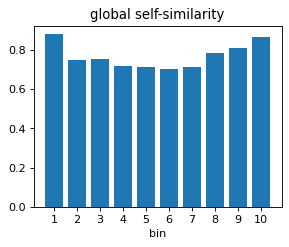

############################## STOP words (X) ##############################
number of words:  64


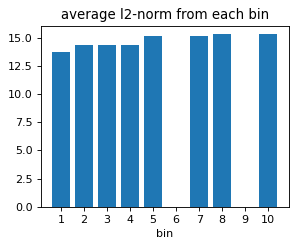

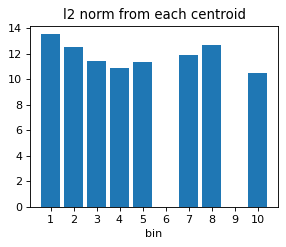

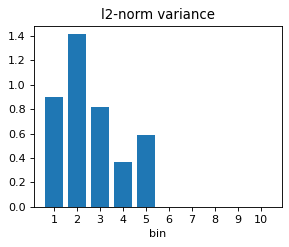

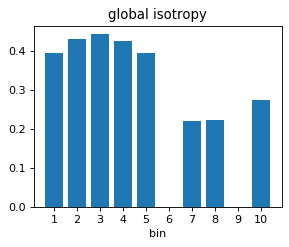

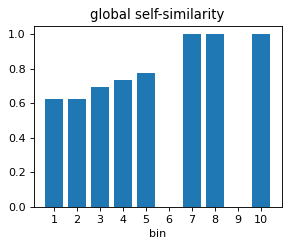

############################## NON_STOP words (.) ##############################
number of words:  998


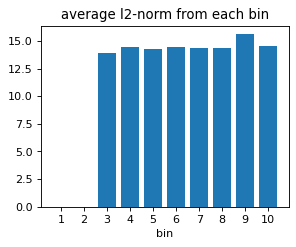

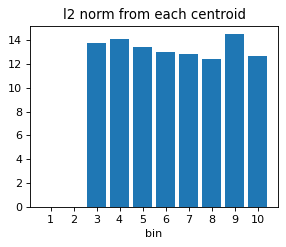

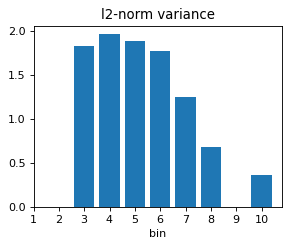

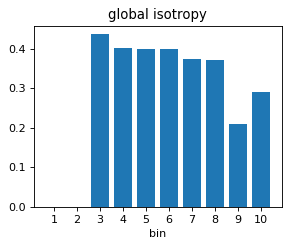

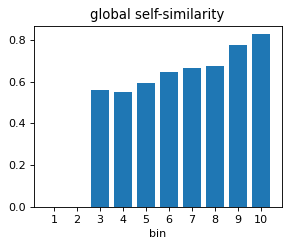

############################## NON_STOP words (ADJ) ##############################
number of words:  187067


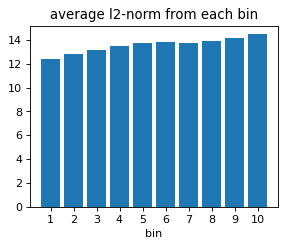

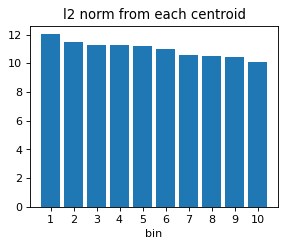

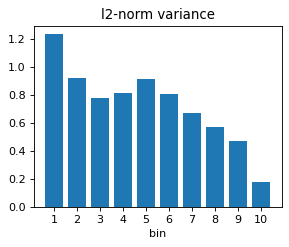

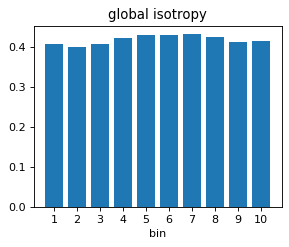

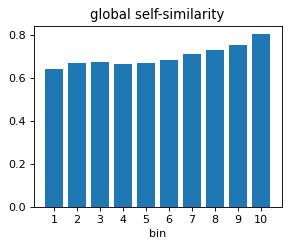

############################## NON_STOP words (ADP) ##############################
number of words:  29772


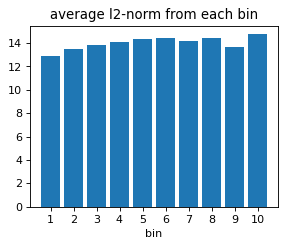

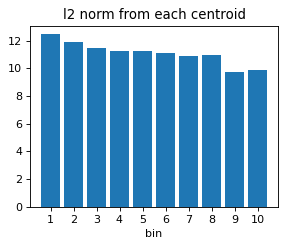

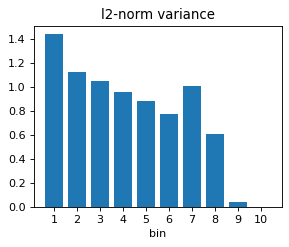

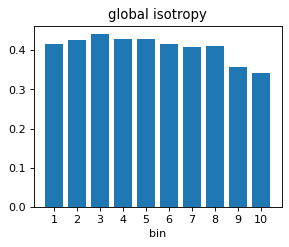

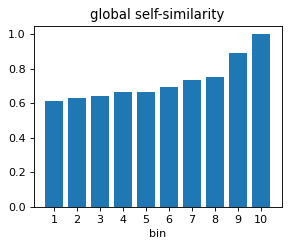

############################## NON_STOP words (ADV) ##############################
number of words:  64764


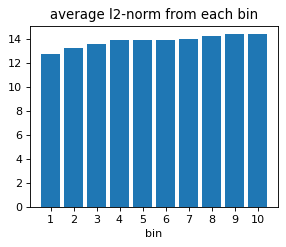

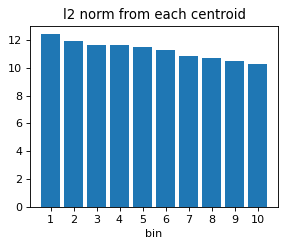

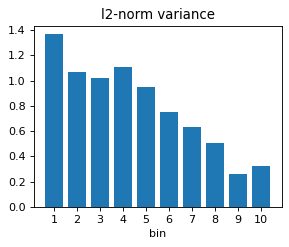

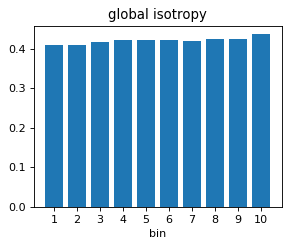

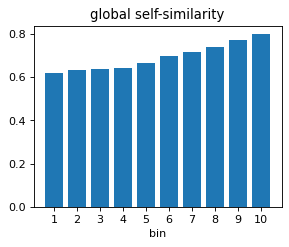

############################## NON_STOP words (CONJ) ##############################
number of words:  5104


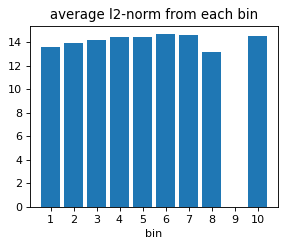

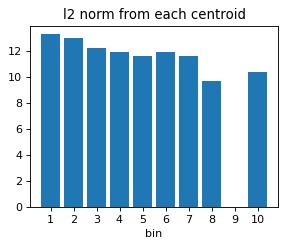

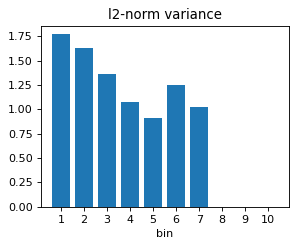

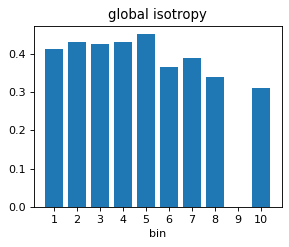

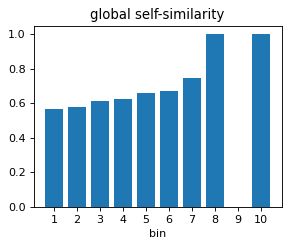

############################## NON_STOP words (DET) ##############################
number of words:  14381


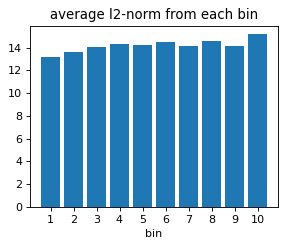

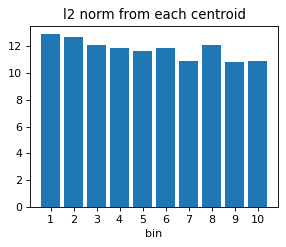

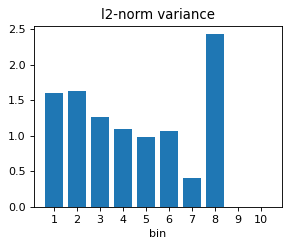

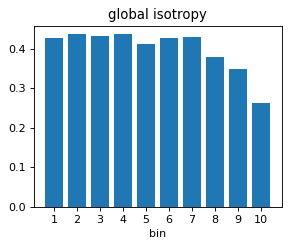

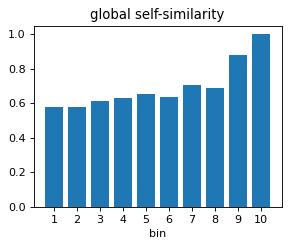

############################## NON_STOP words (NOUN) ##############################
number of words:  449252


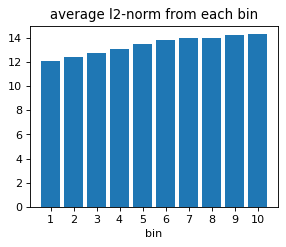

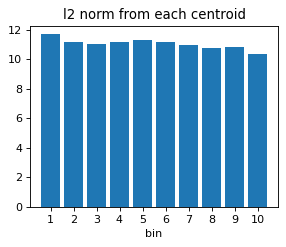

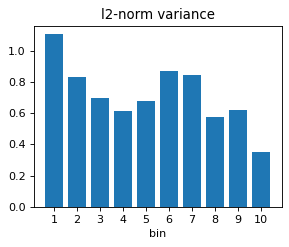

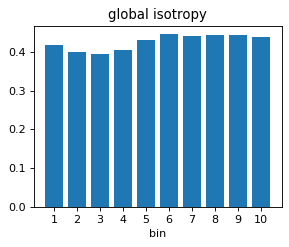

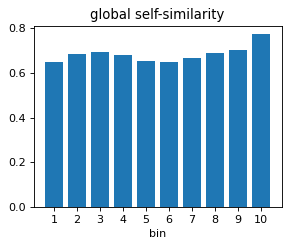

############################## NON_STOP words (NUM) ##############################
number of words:  5581


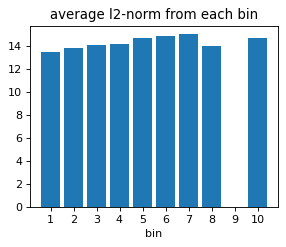

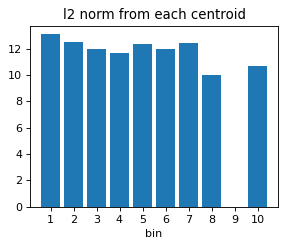

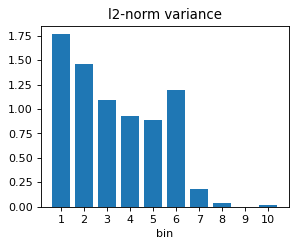

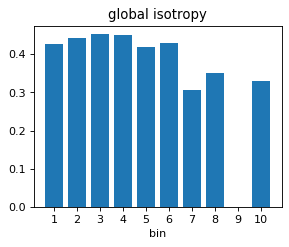

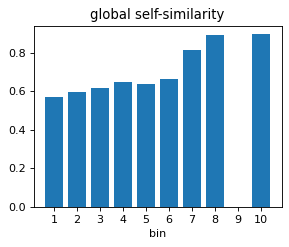

############################## NON_STOP words (PRON) ##############################
number of words:  8369


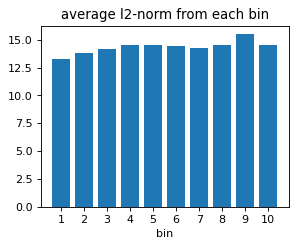

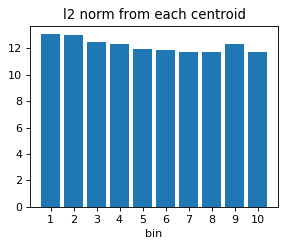

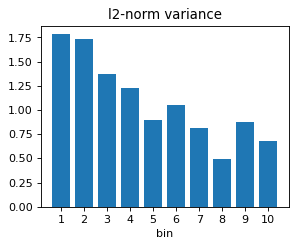

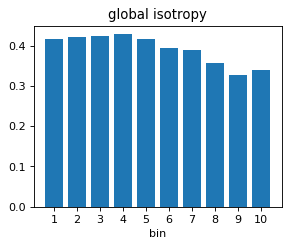

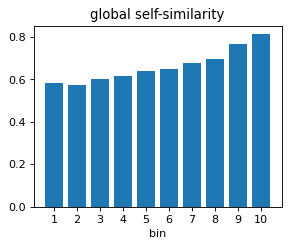

############################## NON_STOP words (PRT) ##############################
number of words:  9906


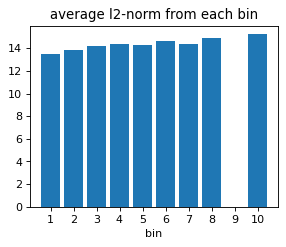

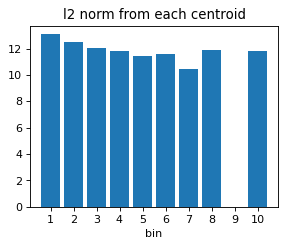

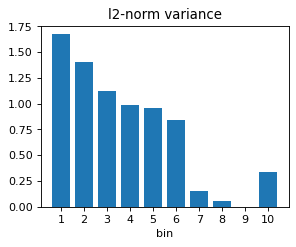

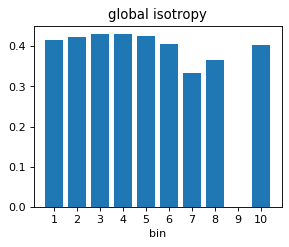

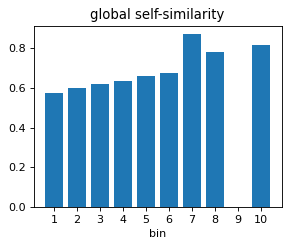

############################## NON_STOP words (VERB) ##############################
number of words:  209669


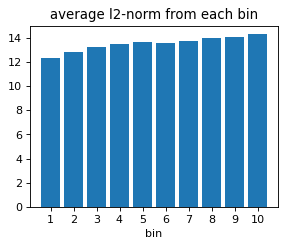

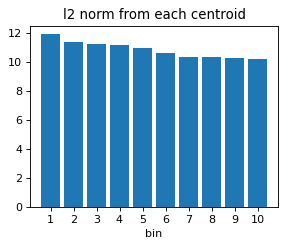

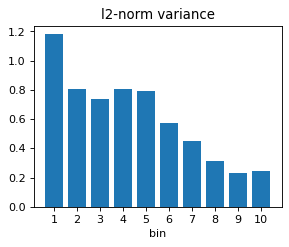

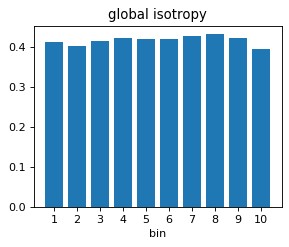

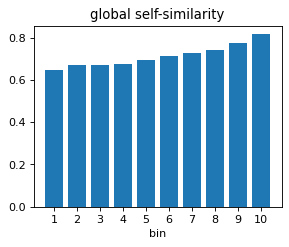

############################## NON_STOP words (X) ##############################
number of words:  12562


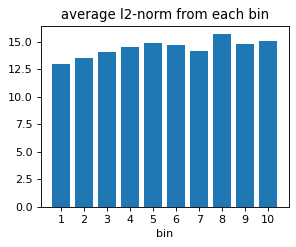

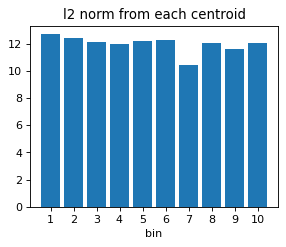

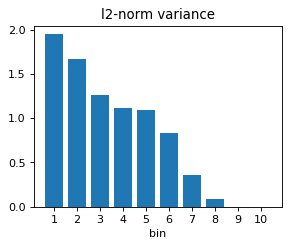

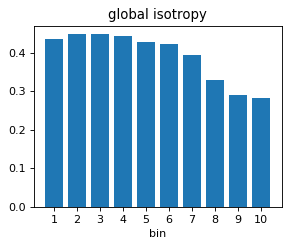

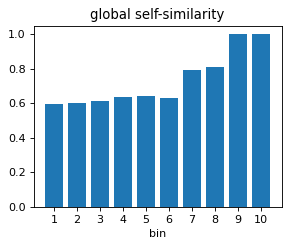

In [60]:
# plot all properties for stop and non-stop words with word type
pos_list = sorted(set([i[1] for i in list(new_dict.keys())]))
stop_or_non = ['STOP', 'NON_STOP']
for typ in stop_or_non:
    for pos in pos_list:
        global_plot(pos, typ)

In [55]:
# plot all properties for all words
t = [i for i in sorted(new_dict.items(), key=lambda x:-x[1][0])]
freq = [np.log2(g[1][0]) for g in t]
no_bin = 10
move = max(freq)/no_bin
x=[j for j in range(1,no_bin+1)]
l2_glo = []
iso_glo = []
self_sim_glo = []
norm2=[]
l2_norm_var = []
for index in range(no_bin):
    left = index*move
    if index == no_bin-1:
        right = max(freq)+1
    else:
        right = (index+1)*move
    #print(len([k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]))
    temp = [k for k in new_dict.items() if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]
    print(index+1, left, 'to', right, ': ', len(temp))
    emb_all = [h[1][1]/h[1][0] for h in temp]
    norms = [j[1][2]/j[1][0] for j in temp]
    print('l2-norm var: ', np.var(norms))
    l2_norm_var.append(np.var(norms))
    l2_glo.append(avg_norm(emb_all))
    print('l2_global: ', l2_glo[-1])
    self_sim_glo.append(self_sim_simple(emb_all))
    print('self_sim_global: ', self_sim_glo[-1])
    iso_glo.append(iso_matrix(emb_all, c_all))
    print('isotropy_global: ', iso_glo[-1])
    norm2.append(global_l2_norm(norms))
    print('norm2: ', norm2[-1])
        
        #print(type(embs[0]))
        #print(isotropy(embs, c_all))
        #y.append(isotropy(embs, c_all))
    #else:
        #y.append(0)
#figure(figsize=(8, 6), dpi=80)
#plt.bar(x,y)

1 0.0 to 2.5180947690553235 :  341739
l2-norm var:  1.332594535328876
l2_global:  11.928297747547477
self_sim_global:  0.6372560167356208
isotropy_global:  0.4559120516309308
norm2:  12.404045973444898
2 2.5180947690553235 to 5.036189538110647 :  181176
l2-norm var:  1.0267918812996233
l2_global:  11.34786400909418
self_sim_global:  0.6692293982666778
isotropy_global:  0.4597370201655834
norm2:  12.841045366477598
3 5.036189538110647 to 7.55428430716597 :  81589
l2-norm var:  0.8655889581924092
l2_global:  11.205670215573633
self_sim_global:  0.6724063034569088
isotropy_global:  0.45483101261958686
norm2:  13.208761485414582
4 7.55428430716597 to 10.072379076221294 :  39103
l2-norm var:  0.7987675794139759
l2_global:  11.234681339296596
self_sim_global:  0.6622013712435083
isotropy_global:  0.4534250421320661
norm2:  13.568815346634567
5 10.072379076221294 to 12.590473845276618 :  17050
l2-norm var:  0.7911682706775447
l2_global:  11.026801646336082
self_sim_global:  0.6643177867075565

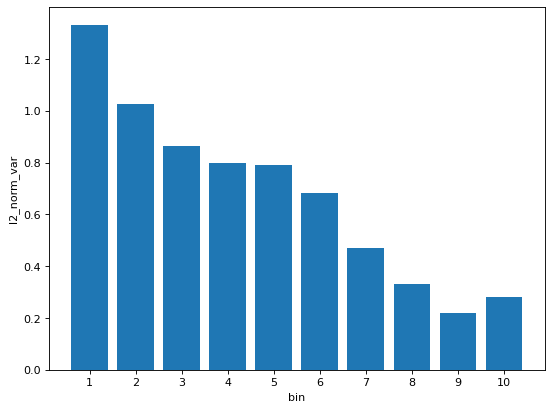

In [56]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, l2_norm_var)

plt.ylabel('l2_norm_var')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

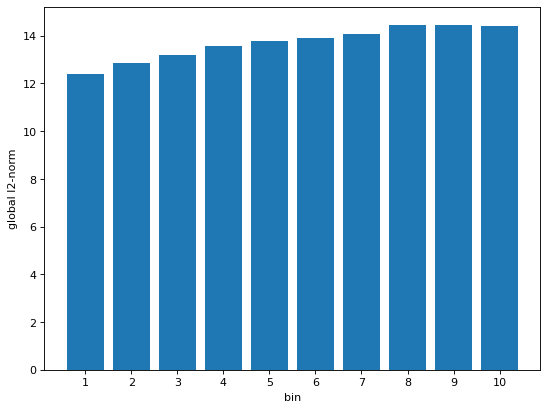

In [57]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, norm2)

plt.ylabel('global l2-norm')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

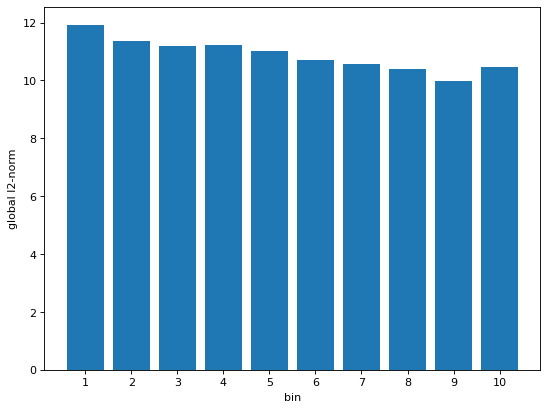

In [58]:

# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, l2_glo)

plt.ylabel('global l2-norm')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()


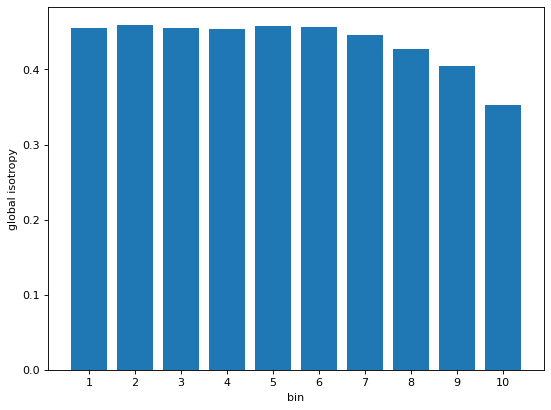

In [59]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, iso_glo)

plt.ylabel('global isotropy')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

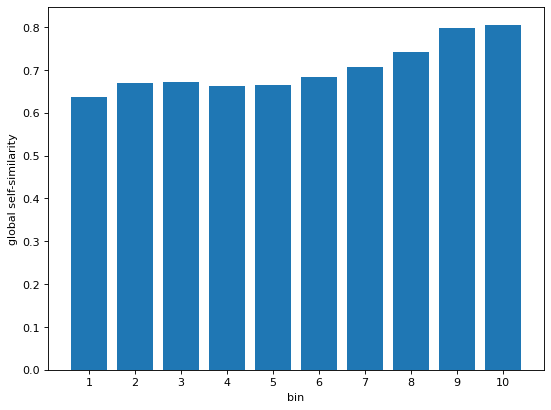

In [60]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, self_sim_glo)

plt.ylabel('global self-similarity')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

In [47]:
# plot all properties for stop words
t = [i for i in sorted(new_dict.items(), key=lambda x:-x[1][0]) if i[0][2]=='STOP']
freq = [np.log2(g[1][0]) for g in t]
no_bin = 10
move = max(freq)/no_bin
x=[j for j in range(1,no_bin+1)]
l2_glo = []
iso_glo = []
self_sim_glo = []
norm2=[]
l2_norm_var = []
for index in range(no_bin):
    left = index*move
    if index == no_bin-1:
        right = max(freq)+1
    else:
        right = (index+1)*move
    #print(len([k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]))
    temp = [k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]
    print(index+1, left, 'to', right, ': ', len(temp))
    emb_all = [h[1][1]/h[1][0] for h in temp]
    norms = [j[1][2]/j[1][0] for j in temp]
    print('l2-norm var: ', np.var(norms))
    l2_norm_var.append(np.var(norms))
    l2_glo.append(avg_norm(emb_all))
    print('l2_global: ', l2_glo[-1])
    self_sim_glo.append(self_sim_simple(emb_all))
    print('self_sim_global: ', self_sim_glo[-1])
    iso_glo.append(iso_matrix(emb_all, c_all))
    print('isotropy_global: ', iso_glo[-1])
    norm2.append(global_l2_norm(norms))
    print('norm2: ', norm2[-1])
        
        #print(type(embs[0]))
        #print(isotropy(embs, c_all))
        #y.append(isotropy(embs, c_all))
    #else:
        #y.append(0)
#figure(figsize=(8, 6), dpi=80)
#plt.bar(x,y)

1 0.0 to 2.5180947690553235 :  182
l2-norm var:  1.5671634485367332
l2_global:  12.845881483057044
self_sim_global:  0.5932146983814763
isotropy_global:  0.43601943754868683
norm2:  14.020109139955958
2 2.5180947690553235 to 5.036189538110647 :  207
l2-norm var:  0.91763440548588
l2_global:  11.399095733384579
self_sim_global:  0.6631110156503852
isotropy_global:  0.44272161640589
norm2:  14.149888687774743
3 5.036189538110647 to 7.55428430716597 :  180
l2-norm var:  0.7032203938367396
l2_global:  11.044074196285672
self_sim_global:  0.6919294362266858
isotropy_global:  0.43220565860149923
norm2:  14.323473169475697
4 7.55428430716597 to 10.072379076221294 :  204
l2-norm var:  0.4376455455023916
l2_global:  10.66514916045993
self_sim_global:  0.7067381114351983
isotropy_global:  0.4366422715191779
norm2:  14.314408990343422
5 10.072379076221294 to 12.590473845276618 :  192
l2-norm var:  0.4598093693252811
l2_global:  10.622149383028349
self_sim_global:  0.7097749710083008
isotropy_glob

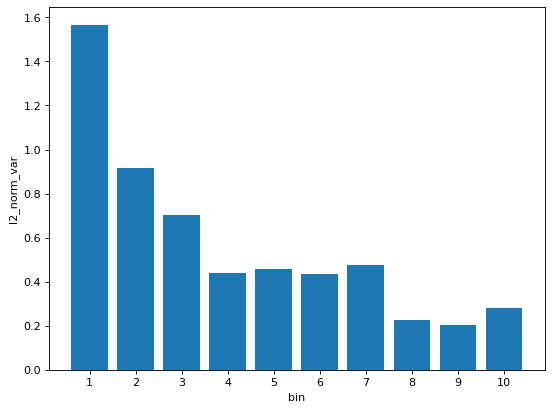

In [48]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, l2_norm_var)

plt.ylabel('l2_norm_var')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

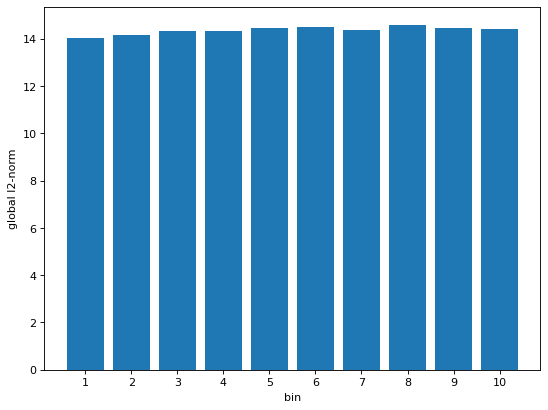

In [49]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, norm2)

plt.ylabel('global l2-norm')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

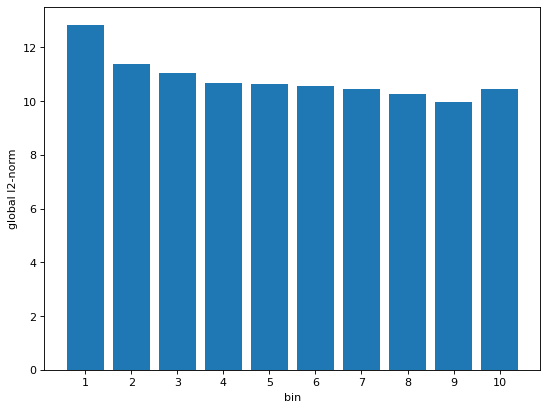

In [50]:

# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, l2_glo)

plt.ylabel('global l2-norm')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()


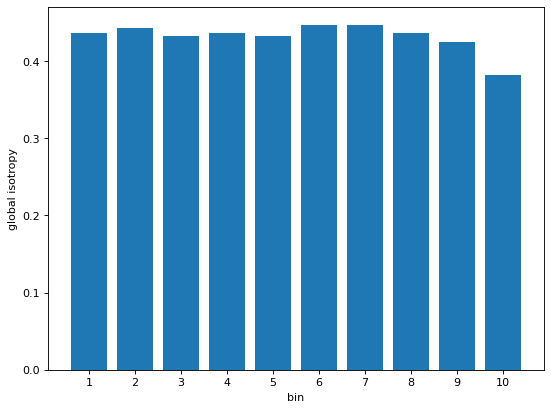

In [51]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, iso_glo)

plt.ylabel('global isotropy')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

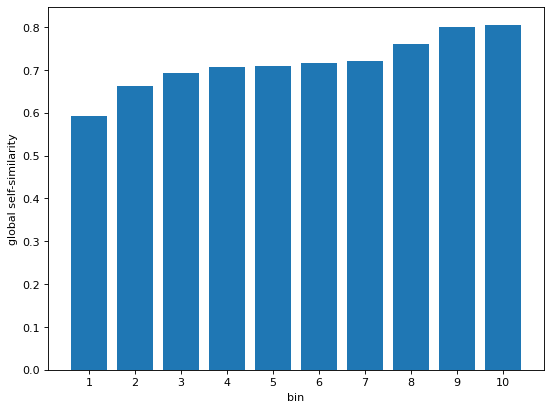

In [52]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, self_sim_glo)

plt.ylabel('global self-similarity')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

In [53]:
# plot all properties for non-stop words
t = [i for i in sorted(new_dict.items(), key=lambda x:-x[1][0]) if i[0][2]=='NON_STOP']
freq = [np.log2(g[1][0]) for g in t]
no_bin = 10
move = max(freq)/no_bin
x=[j for j in range(1,no_bin+1)]
l2_glo = []
iso_glo = []
self_sim_glo = []
norm2=[]
l2_norm_var = []
for index in range(no_bin):
    left = index*move
    if index == no_bin-1:
        right = max(freq)+1
    else:
        right = (index+1)*move
    #print(len([k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]))
    temp = [k for k in t if np.log2(k[1][0])>left and np.log2(k[1][0])<=right]
    print(index+1, left, 'to', right, ': ', len(temp))
    emb_all = [h[1][1]/h[1][0] for h in temp]
    norms = [j[1][2]/j[1][0] for j in temp]
    print('l2-norm var: ', np.var(norms))
    l2_norm_var.append(np.var(norms))
    l2_glo.append(avg_norm(emb_all))
    print('l2_global: ', l2_glo[-1])
    self_sim_glo.append(self_sim_simple(emb_all))
    print('self_sim_global: ', self_sim_glo[-1])
    iso_glo.append(iso_matrix(emb_all, c_all))
    print('isotropy_global: ', iso_glo[-1])
    norm2.append(global_l2_norm(norms))
    print('norm2: ', norm2[-1])
        
        #print(type(embs[0]))
        #print(isotropy(embs, c_all))
        #y.append(isotropy(embs, c_all))
    #else:
        #y.append(0)
#figure(figsize=(8, 6), dpi=80)
#plt.bar(x,y)

1 0.0 to 2.1683239231900364 :  316640
l2-norm var:  1.3479054389222285
l2_global:  11.963527226914897
self_sim_global:  0.635565748114841
isotropy_global:  0.4151825135402325
norm2:  12.382076589852874
2 2.1683239231900364 to 4.336647846380073 :  172655
l2-norm var:  1.0445064983489598
l2_global:  11.39185977585154
self_sim_global:  0.6670465790130383
isotropy_global:  0.4040132191269103
norm2:  12.78460244671288
3 4.336647846380073 to 6.504971769570109 :  87998
l2-norm var:  0.895495133473863
l2_global:  11.206782927092954
self_sim_global:  0.6747826691159373
isotropy_global:  0.40547285678818934
norm2:  13.09026272751479
4 6.504971769570109 to 8.673295692760146 :  47359
l2-norm var:  0.8092496325065812
l2_global:  11.227875031717913
self_sim_global:  0.6670128414080341
isotropy_global:  0.4184998253357779
norm2:  13.40195297160132
5 8.673295692760146 to 10.841619615950183 :  25278
l2-norm var:  0.7847573770137787
l2_global:  11.195326334615798
self_sim_global:  0.6610404933337896
iso

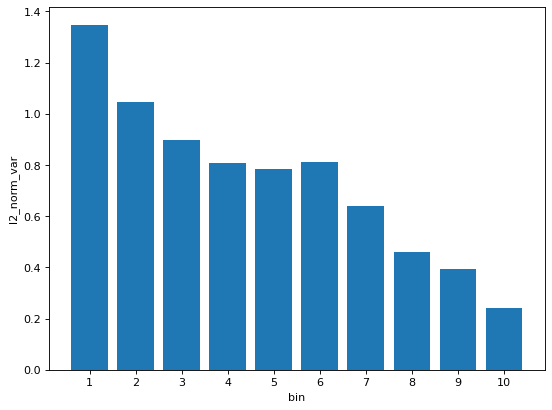

In [54]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, l2_norm_var)

plt.ylabel('l2_norm_var')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

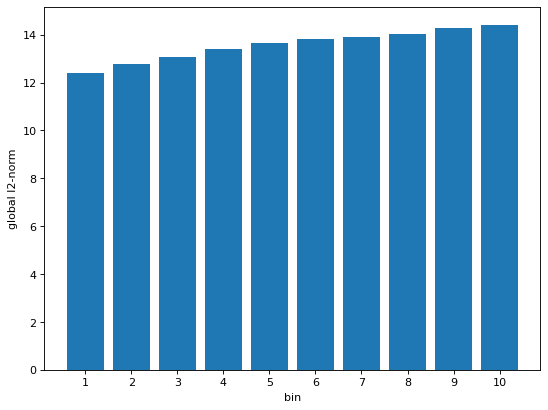

In [55]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, norm2)

plt.ylabel('global l2-norm')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

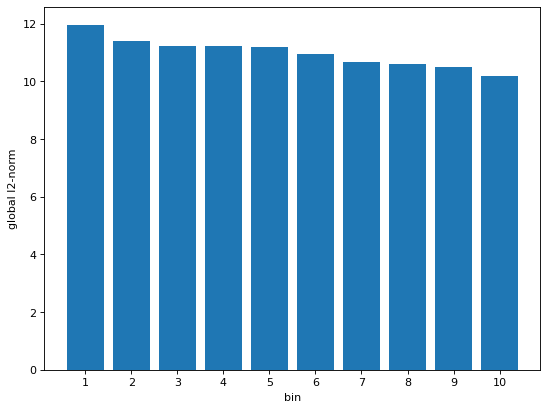

In [56]:

# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, l2_glo)

plt.ylabel('global l2-norm')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()


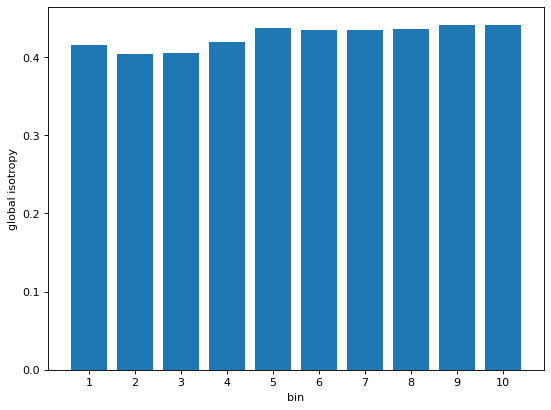

In [57]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, iso_glo)

plt.ylabel('global isotropy')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()

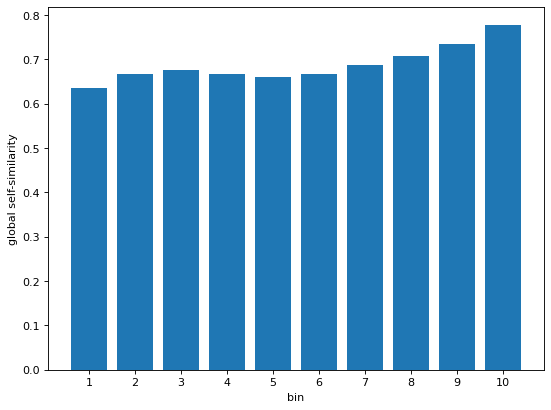

In [58]:
# plot 
figure(figsize=(8, 6), dpi=80)


plt.bar(x, self_sim_glo)

plt.ylabel('global self-similarity')
plt.xlabel('bin')
#plt.title('acc of default BERT')
plt.xticks(x)
plt.show()